In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
#import data
df = pd.read_csv('pool_data_202211111622.csv_cleaned.csv')

In [3]:
df.head()

,time_stamp,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
0,2022-11-01 11:01:16.220 -0400,10001,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0
1,2022-11-01 11:01:26.323 -0400,10001,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2,2022-11-01 11:01:36.386 -0400,10001,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
3,2022-11-01 11:01:46.498 -0400,10001,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
4,2022-11-01 11:01:56.554 -0400,10001,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0


In [4]:
df['time_stamp']=pd.to_datetime(df['time_stamp'],format='%Y-%m-%d %H:%M:%S')

In [5]:
df['time_stamp']

0        2022-11-01 11:01:16.220000-04:00
1        2022-11-01 11:01:26.323000-04:00
2        2022-11-01 11:01:36.386000-04:00
3        2022-11-01 11:01:46.498000-04:00
4        2022-11-01 11:01:56.554000-04:00
                       ...               
43599    2022-11-01 11:00:26.794000-04:00
43600    2022-11-01 11:00:36.852000-04:00
43601    2022-11-01 11:00:46.971000-04:00
43602    2022-11-01 11:00:56.031000-04:00
43603    2022-11-01 11:01:06.155000-04:00
Name: time_stamp, Length: 43604, dtype: object

In [6]:
df = df.sort_values(by='time_stamp')
df.head()

,time_stamp,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
39637,2022-11-01 00:00:06.605000-04:00,10001,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,0.0,0.0,74.2574,500.0
39638,2022-11-01 00:00:16.661000-04:00,10001,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,0.0,0.0,74.2574,500.0
39639,2022-11-01 00:00:26.768000-04:00,10001,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39640,2022-11-01 00:00:36.834000-04:00,10001,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39641,2022-11-01 00:00:46.936000-04:00,10001,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,0.0,0.0,74.2574,500.0


Per CDC requirements, want to maintain pH of the water to be at 7.2-7.8 (per Elham, normal is ~7.6). Want to flag when sensor reads out of range. 

<AxesSubplot:>

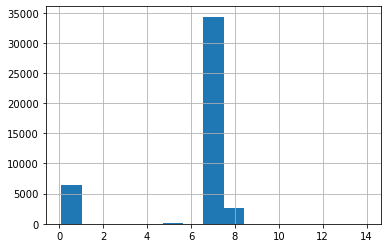

In [7]:
#pH range is from 0-14 

df.loc[(df['PH']<14) & (df['PH']>0), 'PH'].hist(bins = 15)

In [8]:
df.loc[(df['PH']<14) & (df['PH']>0), 'PH'].describe()

count    43589.000000
mean         6.343391
std          2.600213
min          0.095576
25%          7.389770
50%          7.416360
75%          7.449270
max         13.956100
Name: PH, dtype: float64

For the most part, the pH of the water seems to be within the desired range. The extreme min and max values may be due to sensor issues. 

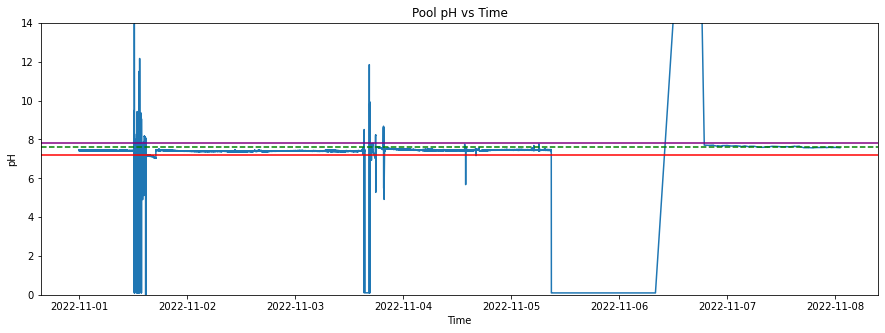

In [9]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['time_stamp'], df['PH'])
ax.set_xlabel('Time')
ax.set_ylabel('pH')
ax.set_ylim([0,14])
ax.set_title('Pool pH vs Time')
ax.axhline(y=7.2, color='red') #getting too acidic
ax.axhline(y=7.8, color='purple') #getting too basic
ax.axhline(y=7.6, linestyle='--',color='green') #desired pH

In [10]:
df.set_index('time_stamp',inplace=True)
df.head()

,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
time_stamp,,,,,,,,,,,,,,
2022-11-01 00:00:06.605000-04:00,10001,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-01 00:00:16.661000-04:00,10001,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-01 00:00:26.768000-04:00,10001,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-01 00:00:36.834000-04:00,10001,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-01 00:00:46.936000-04:00,10001,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,0.0,0.0,74.2574,500.0


In [11]:
df.index[0]

datetime.datetime(2022, 11, 1, 0, 0, 6, 605000, tzinfo=tzoffset(None, -14400))

In [40]:
def summary(time,data,parameter,diff):
    df = data
    time = pd.to_datetime(time)
    time_diff= time-pd.Timedelta(diff)

    df_summary = df.loc[time_diff: time]


    df_summary.plot(y=parameter, use_index=True)
    max_parameter = max(df_summary[parameter])
    min_parameter = min(df_summary[parameter])
    avg_parameter = df_summary[parameter].mean()
    
    print(f"""
            In the past {diff} from {time_diff.floor('S')} to {time.floor('S')} this information was recorded:\n
            Avg {parameter}: {avg_parameter:.2f} \n
            Max {parameter}: {max_parameter:.2f} \n 
            Min {parameter}: {min_parameter:.2f} \n
            Total {parameter} measurements: {len(df_summary)}\n
            """)
    

<AxesSubplot:xlabel='time_stamp'>

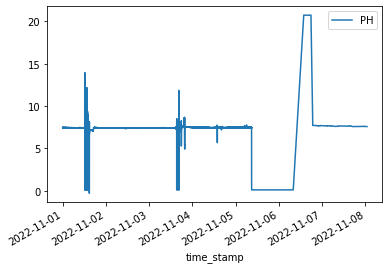

In [41]:
df.plot(y='PH', use_index=True)


            In the past 24 hours from 2022-11-02 00:00:06-04:00 to 2022-11-03 00:00:06-04:00 this information was recorded:

            Avg PH: 7.40 

            Max PH: 7.45 
 
            Min PH: 7.34 

            Total PH measurements: 8622

            


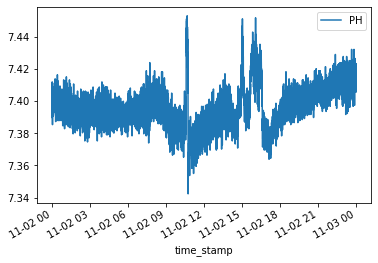

In [45]:
summary('2022-11-03 00:00:06.605000-04:00', df,'PH','24 hours')